In [105]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#Importing all tables
accounts = pd.read_csv("accounts.csv")
products = pd.read_csv("products.csv")
sales_pipeline = pd.read_csv("sales_pipeline.csv")
sales_teams = pd.read_csv("sales_teams.csv")

In [8]:
#Making a copy of each file, so that we can revert back to original file just in case
account_df = accounts.copy()
products_df = products.copy()
sales_df = sales_pipeline.copy()
teams_df = sales_teams.copy()

### Data Preparation

In [5]:
#Checking missing values
account_df.isna().sum()

account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64

In [6]:
len(account_df['account'])

85

Accounts table has 85 records in each column. Only 10 columns have subsidiary company details

In [9]:
products_df.isna().sum()

product        0
series         0
sales_price    0
dtype: int64

No missing values in products

In [10]:
sales_df.isna().sum()

opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

In [11]:
print(f'Length of sales_pipeline columns are: ', len(sales_df['opportunity_id']))

Length of sales_pipeline columns are:  8800


In [16]:
sales_df[sales_df['account'].isna()]['deal_stage'].value_counts()

deal_stage
Engaging       1088
Prospecting     337
Name: count, dtype: int64

In [29]:
len(sales_df[(sales_df['deal_stage'] == 'Prospecting') & (sales_df['account'].notna())])

163

Key deductions:

* `Engage_date` has 500 values that means, 500 sales are at te prospecting stage.
* `Close_date` and `close_value` have the same size of missing values, meaning they has to be sales that are still ongoing & prospecting.
* There are 1425 rows without an Account (company). Within those, there are a majority of Engaging sales. We can safely assume these are sort of freelance sales since they are not assigned to a company. Furthermore there are 163 Prospecting sales with companies assigned to them.

In [31]:
teams_df.isna().sum()

sales_agent        0
manager            0
regional_office    0
dtype: int64

In [34]:
#How many sales agents?
len(set(teams_df['sales_agent']))

35

No missing values for sales_team table as well

### Deriving Insights

A list of insights we can derive

01. How Many Subsidiary Companies For Each Parent Company?
02. Ranking companies with most employees
03. Ranking companies with highest employees
04. Revenue Per Employee
05. Location Distribution of Each Company
06. Breaking Down Subsidiary Companies By Location
07. Frequency Distribution of Companies Established in Each Year
08. Breaking Down Product Series Price Ranges
09. Sales Agent Win Rate
10. How much Revenue did each Agent Drived?
11. What products do each agent specialize in

**01. How Many Subsidiary Companies For Each Parent Company?**

In [41]:
susidiaries = account_df[account_df['subsidiary_of'].notna()]
susidiaries

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
6,Bluth Company,technolgy,1993,1242.32,3027,United States,Acme Corporation
9,Cheers,entertainment,1993,4269.90,6472,United States,Massive Dynamic
10,Codehow,software,1998,2714.90,2641,United States,Acme Corporation
13,Dalttechnology,software,2013,98.79,96,United States,Bubba Gump
14,dambase,marketing,1995,2173.98,2928,United States,Inity
17,Donquadtech,technolgy,1992,1712.68,3194,United States,Acme Corporation
21,Faxquote,telecommunications,1995,1825.82,5595,United States,Sonron
24,Funholding,finance,1991,2819.50,7227,United States,Golddex
29,Gogozoom,telecommunications,2007,86.68,187,United States,Sonron
39,Iselectrics,technolgy,2011,527.11,1428,United States,Acme Corporation


In [48]:
sub_values = susidiaries['subsidiary_of'].value_counts()
sub_values

subsidiary_of
Acme Corporation    4
Sonron              3
Bubba Gump          2
Golddex             2
Inity               2
Massive Dynamic     1
Warephase           1
Name: count, dtype: int64

In [52]:
#Let's convert into a data frame
df_sub_values = sub_values.reset_index()
df_sub_values.columns = ['Parent Company', 'Number of Subsidiaries']
df_sub_values

,Parent Company,Number of Subsidiaries
0,Acme Corporation,4
1,Sonron,3
2,Bubba Gump,2
3,Golddex,2
4,Inity,2
5,Massive Dynamic,1
6,Warephase,1


**02. Ranking companies with most employees**

In [60]:
ranked_emp_heads = account_df.sort_values(by=['employees'], ascending= False)
ranked_emp_heads.reset_index(inplace=True)
ranked_emp_heads.index = ranked_emp_heads.index + 1
ranked_emp_heads.drop('index', axis = 1, inplace= True)
ranked_emp_heads.head(10) #Top 10 Companies with most employees

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
1,Kan-code,software,1982,11698.03,34288,United States,NaN
2,Xx-holding,finance,1993,7537.24,20293,United States,NaN
3,Initech,telecommunications,1994,6395.05,20275,United States,NaN
4,Ganjaflex,retail,1995,5158.71,17479,Japan,NaN
5,Scotfind,software,1996,6354.87,16780,United States,Bubba Gump
6,Hottechi,technolgy,1997,8170.38,16499,Korea,NaN
7,Zotware,software,1979,4478.47,13809,United States,NaN
8,Konex,technolgy,1980,7708.38,13756,United States,NaN
9,Dontechi,software,1982,4618.00,10083,United States,NaN
10,Y-corporation,employment,1983,2871.35,9561,United States,NaN


**03. Ranking companies with highest employees**

In [61]:
ranked_rev = account_df.sort_values(by=['revenue'], ascending = False)
ranked_rev.reset_index(inplace= True)
ranked_rev.index = ranked_rev.index + 1 #Re-naming the index
ranked_rev.drop('index', axis= 1, inplace = True)
ranked_rev.head(10) #Companies with Top 10 Revenue

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
1,Kan-code,software,1982,11698.03,34288,United States,NaN
2,Hottechi,technolgy,1997,8170.38,16499,Korea,NaN
3,Konex,technolgy,1980,7708.38,13756,United States,NaN
4,Xx-holding,finance,1993,7537.24,20293,United States,NaN
5,Initech,telecommunications,1994,6395.05,20275,United States,NaN
6,Scotfind,software,1996,6354.87,16780,United States,Bubba Gump
7,Treequote,telecommunications,1988,5266.09,8595,United States,Sonron
8,Ganjaflex,retail,1995,5158.71,17479,Japan,NaN
9,Fasehatice,retail,1990,4968.91,7523,United States,NaN
10,Dontechi,software,1982,4618.00,10083,United States,NaN


**04. Revenue Per Employee**

In [67]:
rev_per_emp = account_df.copy()
#We need to add a new column to see revenue devided per employee
rev_per_emp['rev_per_emp'] = (rev_per_emp['revenue'] / rev_per_emp['employees'] * 1000000).round(2)
#multiplied by million since revenue is in million per usd
rev_per_emp.head()

,account,sector,year_established,revenue,employees,office_location,subsidiary_of,rev_per_emp
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,389808.65
1,Betasoloin,medical,1999,251.41,495,United States,NaN,507898.99
2,Betatech,medical,1986,647.18,1185,Kenya,NaN,546143.46
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN,433141.59
4,Bioplex,medical,1991,326.82,1016,United States,NaN,321673.23


In [68]:
#Let's sort the dataframe
rev_per_emp.sort_values(by = ['rev_per_emp'], ascending = False, inplace = True)
rev_per_emp.reset_index(inplace = True)
rev_per_emp.drop('index',axis = 1, inplace = True)
rev_per_emp.head(10)

,account,sector,year_established,revenue,employees,office_location,subsidiary_of,rev_per_emp
0,Streethex,retail,1988,1376.80,1165,Belgium,NaN,1181802.58
1,Plusstrip,entertainment,2002,349.81,315,United States,NaN,1110507.94
2,Dalttechnology,software,2013,98.79,96,United States,Bubba Gump,1029062.50
3,Codehow,software,1998,2714.90,2641,United States,Acme Corporation,1027981.83
4,Conecom,technolgy,2005,1520.66,1806,United States,NaN,842004.43
5,Rundofase,technolgy,1983,1008.06,1238,United States,NaN,814264.94
6,Groovestreet,retail,2003,223.80,299,United States,NaN,748494.98
7,dambase,marketing,1995,2173.98,2928,United States,Inity,742479.51
8,Vehement Capital Partners,finance,1993,646.10,883,United States,Golddex,731710.08
9,Gekko & Co,retail,1990,2520.83,3502,United States,NaN,719825.81


In [69]:
rev_per_emp.head(10)['sector'].value_counts()

sector
retail           3
software         2
technolgy        2
entertainment    1
marketing        1
finance          1
Name: count, dtype: int64

It seems retail industry brings more revenue with less employee head counts

**05. Location Distribution of Each Company**

In [78]:
location_dis = account_df['office_location'].value_counts().reset_index()
location_dis.columns=['Location', 'Companies']
location_dis

,Location,Companies
0,United States,71
1,Kenya,1
2,Philipines,1
3,Japan,1
4,Italy,1
5,Norway,1
6,Korea,1
7,Jordan,1
8,Brazil,1
9,Germany,1


**06.Breaking Down Subsidiary Companies By Location**

In [85]:
temp_1 = account_df.groupby(['subsidiary_of', 'office_location']).count().reset_index()
sub_loc_dis = temp_1[['subsidiary_of', 'office_location', 'account']]
sub_loc_dis.columns = ['Parent Company', 'Location', 'Number of Subsidiaries']
sub_loc_dis

,Parent Company,Location,Number of Subsidiaries
0,Acme Corporation,United States,4
1,Bubba Gump,United States,2
2,Golddex,United States,2
3,Inity,United States,2
4,Massive Dynamic,United States,1
5,Sonron,United States,3
6,Warephase,Brazil,1


**07. Frequncy Distribution of Companies Established in Each Year**

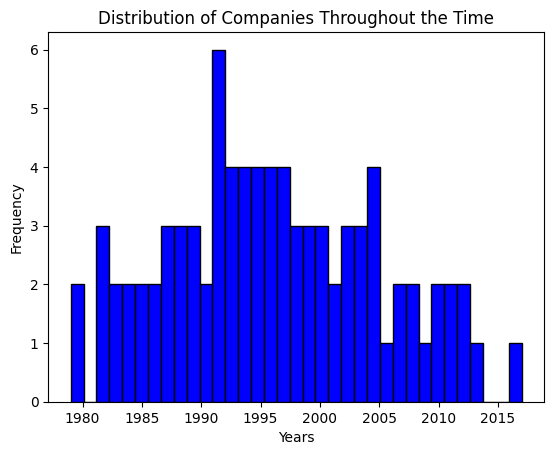

In [91]:
fig, ax = plt.subplots()

ax.hist(account_df['year_established'], bins=35, color='blue', edgecolor='black')
ax.set_title('Distribution of Companies Throughout the Time')
ax.set_xlabel('Years')
ax.set_ylabel('Frequency')
plt.show()

**08. Breaking Down Product Series Price Ranges**

In [100]:
#Let's get the maximum price of each series
prod_s_max = products_df.groupby('series').max().reset_index()
prod_s_max

,series,product,sales_price
0,GTK,GTK 500,26768
1,GTX,GTX Pro,5482
2,MG,MG Special,3393


In [101]:
#Let's get the minimum price of each series
prod_s_min= products_df.groupby('series').min().reset_index()
prod_s_min

,series,product,sales_price
0,GTK,GTK 500,26768
1,GTX,GTX Basic,550
2,MG,MG Advanced,55


In [109]:
#Let's combine both max and min price of each series
product_price_range = pd.DataFrame([prod_s_max['series'], prod_s_max['sales_price'], prod_s_min['sales_price']]).T
product_price_range.columns = ['Series', 'Highest End', 'Lowest End']
product_price_range

,Series,Highest End,Lowest End
0,GTK,26768,26768
1,GTX,5482,550
2,MG,3393,55


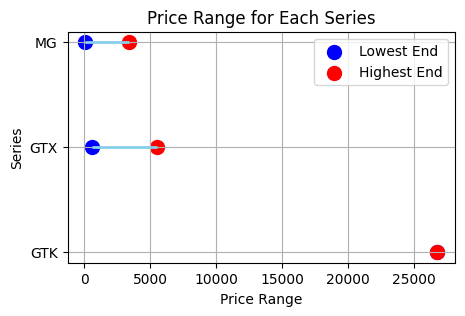

In [112]:
#ChatGPT Generated Code
plt.figure(figsize=(5, 3))

# Plot horizontal lines
plt.hlines(y=product_price_range['Series'], xmin=product_price_range['Lowest End'], xmax=product_price_range['Highest End'], color='skyblue', linewidth=2)

# Adding markers at the endpoints
plt.scatter(product_price_range['Lowest End'], product_price_range['Series'], color='blue', label='Lowest End', s=100)
plt.scatter(product_price_range['Highest End'], product_price_range['Series'], color='red', label='Highest End', s=100)

# Set labels
plt.xlabel('Price Range')
plt.ylabel('Series')
plt.title('Price Range for Each Series')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

**09. Sales Agent Win Rate**

In [122]:
#Selecting already closed sales
closed_sales = sales_df[sales_df['close_date'].notna()]
closed_sales

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
...,...,...,...,...,...,...,...,...
8295,2EBLR9N8,Lajuana Vencill,GTX Basic,Conecom,Won,2017-12-24,2017-12-26,622.0
8296,VDGA4KXA,Violet Mclelland,GTX Plus Basic,Bluth Company,Won,2017-12-24,2017-12-30,1093.0
8297,6WCNNK5J,Maureen Marcano,GTXPro,Hottechi,Won,2017-12-26,2017-12-29,4433.0
8298,YJTQSZ9D,Gladys Colclough,GTX Plus Basic,Inity,Won,2017-12-27,2017-12-30,1052.0


In [127]:
#Grouping by Sales_Agent, Total Sales
#closed_sales.groupby('sales_agent').count().reset_index
total_sales = closed_sales['sales_agent'].value_counts().reset_index()
total_sales.columns= ['Sales_Agent', 'Total_Deals']
total_sales

,Sales_Agent,Total_Deals
0,Darcel Schlecht,553
1,Vicki Laflamme,347
2,Anna Snelling,336
3,Kary Hendrixson,335
4,Donn Cantrell,275
5,Kami Bicknell,272
6,Jonathan Berthelot,264
7,Versie Hillebrand,264
8,Zane Levy,261
9,Cassey Cress,261


In [149]:
temp_2 = closed_sales.groupby(['sales_agent', 'deal_stage']).count().reset_index()
temp_2.head()

,sales_agent,deal_stage,opportunity_id,product,account,engage_date,close_date,close_value
0,Anna Snelling,Lost,128,128,128,128,128,128
1,Anna Snelling,Won,208,208,208,208,208,208
2,Boris Faz,Lost,52,52,52,52,52,52
3,Boris Faz,Won,101,101,101,101,101,101
4,Cassey Cress,Lost,98,98,98,98,98,98


In [160]:
temp_3 = temp_2[['sales_agent','deal_stage', 'opportunity_id']]
temp_3.head() #Filtering only the needed information

,sales_agent,deal_stage,opportunity_id
0,Anna Snelling,Lost,128
1,Anna Snelling,Won,208
2,Boris Faz,Lost,52
3,Boris Faz,Won,101
4,Cassey Cress,Lost,98


In [165]:
temp_4 = temp_3.pivot_table(index='sales_agent', columns = 'deal_stage', aggfunc = 'first').reset_index()
temp_4.head()

sales_agent opportunity_id     
deal_stage                           Lost  Won
0            Anna Snelling            128  208
1                Boris Faz             52  101
2             Cassey Cress             98  163
3           Cecily Lampkin             53  107
4            Corliss Cosme             79  150

In [171]:
temp_4.columns = temp_4.columns.droplevel() #Got the error because ran twice when it's only can be ran once

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [186]:
temp_4.columns = ['Sales_Agent', 'Lost', 'Wins']
temp_4.head() #Renaming the column names

,Sales_Agent,Lost,Wins
0,Anna Snelling,128,208
1,Boris Faz,52,101
2,Cassey Cress,98,163
3,Cecily Lampkin,53,107
4,Corliss Cosme,79,150


In [187]:
win_lose_details = pd.merge(left = total_sales, right = temp_4, how = 'left', left_on = 'Sales_Agent', right_on = 'Sales_Agent')
win_lose_details

,Sales_Agent,Total_Deals,Lost,Wins
0,Darcel Schlecht,553,204,349
1,Vicki Laflamme,347,126,221
2,Anna Snelling,336,128,208
3,Kary Hendrixson,335,126,209
4,Donn Cantrell,275,117,158
5,Kami Bicknell,272,98,174
6,Jonathan Berthelot,264,93,171
7,Versie Hillebrand,264,88,176
8,Zane Levy,261,100,161
9,Cassey Cress,261,98,163


In [194]:
#Let's add a w/l ratio
win_lose_details['W/L Ratio'] = (win_lose_details['Wins'] / win_lose_details['Lost']).round(2)
win_lose_details.head()

,Sales_Agent,Total_Deals,Lost,Wins,W/L Ratio
0,Darcel Schlecht,553,204,349,1.71
1,Vicki Laflamme,347,126,221,1.75
2,Anna Snelling,336,128,208,1.62
3,Kary Hendrixson,335,126,209,1.66
4,Donn Cantrell,275,117,158,1.35


In [198]:
#Ranking the top 10 performers
ranked_wl_ratio = win_lose_details.sort_values(by = 'W/L Ratio', ascending = False)
ranked_wl_ratio.reset_index(inplace = True)
ranked_wl_ratio.index = ranked_wl_ratio.index + 1
ranked_wl_ratio.drop('index', axis = 1, inplace = True)
ranked_wl_ratio.head(10)

,Sales_Agent,Total_Deals,Lost,Wins,W/L Ratio
1,Hayden Neloms,152,45,107,2.38
2,Maureen Marcano,213,64,149,2.33
3,Wilburn Farren,79,24,55,2.29
4,Cecily Lampkin,160,53,107,2.02
5,Versie Hillebrand,264,88,176,2.00
6,Moses Frase,195,66,129,1.95
7,Boris Faz,153,52,101,1.94
8,James Ascencio,206,71,135,1.90
9,Corliss Cosme,229,79,150,1.90
10,Rosalina Dieter,110,38,72,1.89


**10. How much Revenue did each Agent Drived?**

In [201]:
#We need only the sales that were won because lost sales brings no revenue
won_sales = sales_df[sales_df['deal_stage'] == "Won"]
won_sales.head(3) 

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0


In [202]:
len(won_sales)

4238

In [206]:
agent_ttl_revenue = won_sales.groupby('sales_agent').sum('close_value').reset_index()
agent_ttl_revenue.columns = ['Sales_Agent', 'Total_Revenue']
agent_ttl_revenue

,Sales_Agent,Total_Revenue
0,Anna Snelling,275056.0
1,Boris Faz,261631.0
2,Cassey Cress,450489.0
3,Cecily Lampkin,229800.0
4,Corliss Cosme,421036.0
5,Daniell Hammack,364229.0
6,Darcel Schlecht,1153214.0
7,Donn Cantrell,445860.0
8,Elease Gluck,289195.0
9,Garret Kinder,197773.0


In [208]:
#Top 10 revenue drivers (by total revenue brought)
ranked_ttl_rev = agent_ttl_revenue.sort_values(by = 'Total_Revenue', ascending = False)
ranked_ttl_rev.reset_index(inplace = True)
ranked_ttl_rev.index = ranked_ttl_rev.index + 1
ranked_ttl_rev.drop('index', axis= 1, inplace = True)
ranked_ttl_rev.head(10)

,Sales_Agent,Total_Revenue
1,Darcel Schlecht,1153214.0
2,Vicki Laflamme,478396.0
3,Kary Hendrixson,454298.0
4,Cassey Cress,450489.0
5,Donn Cantrell,445860.0
6,Reed Clapper,438336.0
7,Zane Levy,430068.0
8,Corliss Cosme,421036.0
9,James Ascencio,413533.0
10,Daniell Hammack,364229.0


**11. What products do each agent specialize in**

In [212]:
temp_6 = won_sales.copy()
temp_6['deal_stage'].value_counts() #Making sure the data is copied correctly

deal_stage
Won    4238
Name: count, dtype: int64

In [213]:
#Dropping unnecessary data
temp_6.drop(['account', 'deal_stage', 'engage_date', 'close_date'], axis = 1, inplace= True)
temp_6.head()

,opportunity_id,sales_agent,product,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,588.0
4,PE84CX4O,Zane Levy,GTX Basic,517.0


In [216]:
#Replace GTXPro value to GTX Pro (Otherwse it casues problems with joining tables)
temp_6['product'] = temp_6['product'].replace('GTXPro', 'GTX Pro')
temp_6['product'].value_counts()

product
GTX Basic         915
MG Special        793
GTX Pro           729
MG Advanced       654
GTX Plus Basic    653
GTX Plus Pro      479
GTK 500            15
Name: count, dtype: int64

In [218]:
product_agent_sales = pd.merge(left = temp_6, right= products_df, how = 'left', left_on = 'product', right_on = 'product')
product_agent_sales.head()

,opportunity_id,sales_agent,product,close_value,series,sales_price
0,1C1I7A6R,Moses Frase,GTX Plus Basic,1054.0,GTX,1096
1,Z063OYW0,Darcel Schlecht,GTX Pro,4514.0,GTX,4821
2,EC4QE1BX,Darcel Schlecht,MG Special,50.0,MG,55
3,MV1LWRNH,Moses Frase,GTX Basic,588.0,GTX,550
4,PE84CX4O,Zane Levy,GTX Basic,517.0,GTX,550


In [237]:
#Getting how many products from each series did each agent sold
temp_8 = product_agent_sales.groupby(['sales_agent', 'series']).count().reset_index()
#Dropping unnecessary data
temp_8.drop(['product', 'close_value', 'sales_price'], axis = 1, inplace = True)
temp_8.head(4)

,sales_agent,series,opportunity_id
0,Anna Snelling,GTX,85
1,Anna Snelling,MG,123
2,Boris Faz,GTX,80
3,Boris Faz,MG,21


In [238]:
temp_9 = temp_8.pivot_table(index = 'sales_agent', columns = 'series', aggfunc = 'first')
temp_9.head()

opportunity_id              
series                    GTK    GTX     MG
sales_agent                                
Anna Snelling             NaN   85.0  123.0
Boris Faz                 NaN   80.0   21.0
Cassey Cress              NaN  117.0   46.0
Cecily Lampkin            NaN   49.0   58.0
Corliss Cosme             NaN  130.0   20.0

In [239]:
temp_9.columns = temp_9.columns.get_level_values(1) #ChatGPT Code to drop multi-level columns

In [242]:
temp_9.reset_index(inplace = True)

In [248]:
#replacing NaNs with 0s
temp_9.fillna(0, inplace = True)
temp_9.head() 

series,sales_agent,GTK,GTX,MG
0,Anna Snelling,0.0,85.0,123.0
1,Boris Faz,0.0,80.0,21.0
2,Cassey Cress,0.0,117.0,46.0
3,Cecily Lampkin,0.0,49.0,58.0
4,Corliss Cosme,0.0,130.0,20.0


In [250]:
temp_9

series,sales_agent,GTK,GTX,MG
0,Anna Snelling,0.0,85.0,123.0
1,Boris Faz,0.0,80.0,21.0
2,Cassey Cress,0.0,117.0,46.0
3,Cecily Lampkin,0.0,49.0,58.0
4,Corliss Cosme,0.0,130.0,20.0
5,Daniell Hammack,0.0,100.0,14.0
6,Darcel Schlecht,0.0,285.0,64.0
7,Donn Cantrell,0.0,123.0,35.0
8,Elease Gluck,7.0,27.0,46.0
9,Garret Kinder,0.0,49.0,26.0


Using this data frame we can see in which series does each sales agent excels in.

Moreover we can examine the correlation between `total revenue`, `average deal value` for each sales agent based on what series they specialise in. For example a `GTK` salesman would bring more revenue since the unitary gain is way higher in that series. 